In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from openpyxl.utils.dataframe import dataframe_to_rows
import os
#import xlwt
from openpyxl import load_workbook
import time
import scipy
import math
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.signal import savgol_filter #Smooth
import ast


In [5]:
print("test")


test


In [6]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 10,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

In [7]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    return Bin_center, hist

In [8]:
i =27
for ii in np.arange(0,30,1):
    if ii ==0:
        globals()["data_"+str(int(i*10))+"MeV"] = pd.read_csv("data/202304_EJ309_NSTOF_exp_60deg_4E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
    else:
        temp = pd.read_csv("data/202304_EJ309_NSTOF_exp_60deg_4E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        globals()["data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))


NameError: name 'np' is not defined

In [53]:
for i in np.arange(2,10.0,1.0):
    print(i)
    for ii in np.arange(0,30,1):
        if ii ==0:
            globals()["data_"+str(int(i*10))+"MeV"] = pd.read_csv("data/202210_EJ309_N_scatter_exp_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        else:
            temp = pd.read_csv("data/202210_EJ309_N_scatter_exp_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
            globals()["data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))
    

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [54]:
print(data_30MeV)

[[0.00000e+00 1.00000e+00 1.22317e-01 7.07388e-01 2.29300e+00 3.19057e-04]
 [0.00000e+00 2.00000e+00 1.18848e-01 6.93099e-01 2.30728e+00 3.83976e-02]
 [0.00000e+00 3.00000e+00 9.31712e-03 1.04538e-01 2.89552e+00 2.14379e-02]
 ...
 [2.90000e+01 2.49000e+02 2.53789e-01 1.17939e+00 1.66405e+00 4.55729e-02]
 [2.90000e+01 2.50000e+02 5.42385e-01 1.99194e+00 9.48688e-01 7.74526e-02]
 [2.90000e+01 2.51000e+02 1.72706e-01 9.01988e-01 2.09850e+00 6.18044e-02]]


In [34]:

data_1MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_1MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_30deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
    else:
        data_1MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_30deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
        data_1MeV = np.vstack((data_1MeV,data_1MeV_temp))
        #print(data_6MeV.shape)

In [35]:
data_2MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_2MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_2.0MeV_"+str(int(i))+".txt")
    else:
        data_2MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_2.0MeV_"+str(int(i))+".txt")
        data_2MeV = np.vstack((data_2MeV,data_2MeV_temp))
        #print(data_6MeV.shape)

In [19]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy intrigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
print(data_2MeV)
print(data_2MeV.shape)


Core|| counts|| Lightoutput in trigger|| proton_energy intrigger|| neutron_energy on surface|| LO_in_n_detector||
[[0.00000e+00 1.00000e+00 5.32399e-01 2.00094e+00 1.11745e-04 3.01132e-06]
 [0.00000e+00 2.00000e+00 8.09681e-02 5.26814e-01 1.37009e+00 2.21919e-02]
 [0.00000e+00 3.00000e+00 8.33446e-02 6.11899e-01 1.38843e+00 1.65221e-01]
 ...
 [2.90000e+01 2.63000e+02 5.14415e-02 3.78852e-01 1.62135e+00 1.24825e-01]
 [2.90000e+01 2.64000e+02 3.60791e-01 1.77655e+00 2.24417e-01 1.69843e-03]
 [2.90000e+01 2.65000e+02 1.76316e-01 9.15149e-01 1.08535e+00 3.82926e-03]]
(8258, 6)


In [28]:
for i in np.arange(1,3):
    print(i)
    temp = globals()["data_"+str(i)+"MeV"]
    
    print(temp)

1
[[0.00000e+00 1.00000e+00 9.53814e-02 8.23465e-01 5.88574e-02 2.18979e-03]
 [0.00000e+00 2.00000e+00 1.97069e-02 1.85149e-01 8.14952e-01 6.28922e-02]
 [0.00000e+00 3.00000e+00 1.42242e-01 9.92680e-01 7.86035e-03 2.66725e-04]
 ...
 [2.90000e+01 3.23000e+02 1.43791e-01 1.00048e+00 2.00957e-05 7.25006e-07]
 [2.90000e+01 3.24000e+02 2.29178e-02 2.07528e-01 7.92585e-01 6.72140e-02]
 [2.90000e+01 3.25000e+02 1.14448e-02 1.22383e-01 8.77684e-01 1.07538e-01]]
2
[[0.00000e+00 1.00000e+00 5.32399e-01 2.00094e+00 1.11745e-04 3.01132e-06]
 [0.00000e+00 2.00000e+00 8.09681e-02 5.26814e-01 1.37009e+00 2.21919e-02]
 [0.00000e+00 3.00000e+00 8.33446e-02 6.11899e-01 1.38843e+00 1.65221e-01]
 ...
 [2.90000e+01 2.63000e+02 5.14415e-02 3.78852e-01 1.62135e+00 1.24825e-01]
 [2.90000e+01 2.64000e+02 3.60791e-01 1.77655e+00 2.24417e-01 1.69843e-03]
 [2.90000e+01 2.65000e+02 1.76316e-01 9.15149e-01 1.08535e+00 3.82926e-03]]


In [20]:
data = pd.read_csv('data/202210_EJ309_N_scatter_exp_All_in_one_2.0MeV_1.txt', sep="\s+", header=None)

data.columns=["Core", "counts", "Lightoutput in trigger", "proton_energy intrigger","neutron_energy on surface","LO_in_n_detector"]
#data.to_frame()
print(data['counts'])
dataT = data[data['counts']>200]
print(dataT)

0        1
1        2
2        3
3        4
4        5
      ... 
266    267
267    268
268    269
269    270
270    271
Name: counts, Length: 271, dtype: int64
     Core  counts  Lightoutput in trigger  proton_energy intrigger  \
200     1     201                0.161751                 0.955801   
201     1     202                0.383873                 1.941820   
202     1     203                0.003147                 0.045513   
203     1     204                0.158386                 0.848857   
204     1     205                0.263914                 1.292230   
..    ...     ...                     ...                      ...   
266     1     267                0.031354                 0.310616   
267     1     268                0.090080                 0.568780   
268     1     269                0.089698                 0.567047   
269     1     270                0.068679                 0.560006   
270     1     271                0.060506                 0.426579   

In [8]:
print(data.iloc[:,0])

0      1
1      1
2      1
3      1
4      1
      ..
266    1
267    1
268    1
269    1
270    1
Name: Core, Length: 271, dtype: int64


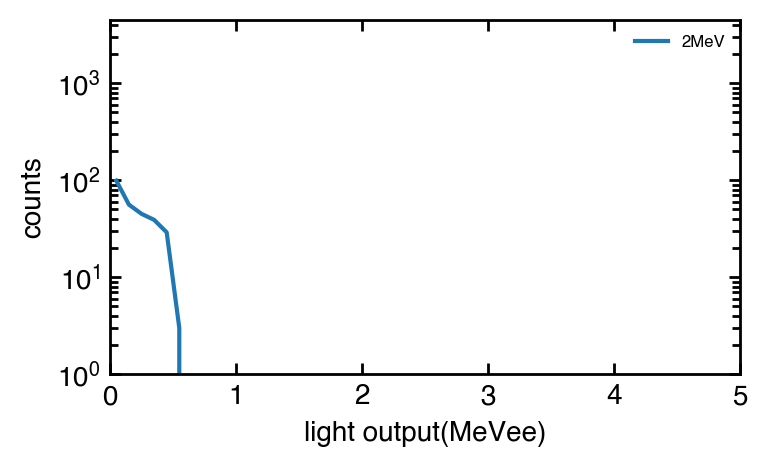

In [9]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data['Lightoutput in trigger'],100,0,10)

plt.plot(axis,y_2MeV,label="2MeV")

fig_post_def(xlim=(0,5),ylim=(1,4500),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")



In [10]:
data_3MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_3MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
    else:
        data_3MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
        data_3MeV = np.vstack((data_3MeV,data_3MeV_temp))

In [11]:
data_4MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_4MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
    else:
        data_4MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
        data_4MeV = np.vstack((data_4MeV,data_4MeV_temp))

In [12]:
data_5MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_5MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        data_5MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
        data_5MeV = np.vstack((data_5MeV,data_5MeV_temp))

In [13]:
data_6MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_6MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
    else:
        data_6MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
        data_6MeV = np.vstack((data_6MeV,data_6MeV_temp))

In [14]:
data_7MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_7MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
    else:
        data_7MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
        data_7MeV = np.vstack((data_7MeV,data_7MeV_temp))

In [15]:
data_8MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_8MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
    else:
        data_8MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
        data_8MeV = np.vstack((data_8MeV,data_8MeV_temp))

In [16]:
data_9MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_9MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
    else:
        data_9MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
        data_9MeV = np.vstack((data_9MeV,data_9MeV_temp))

In [17]:
data_10MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_10MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_10.0MeV_"+str(int(i))+".txt")
    else:
        data_10MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_10.0MeV_"+str(int(i))+".txt")
        data_10MeV = np.vstack((data_10MeV,data_10MeV_temp))

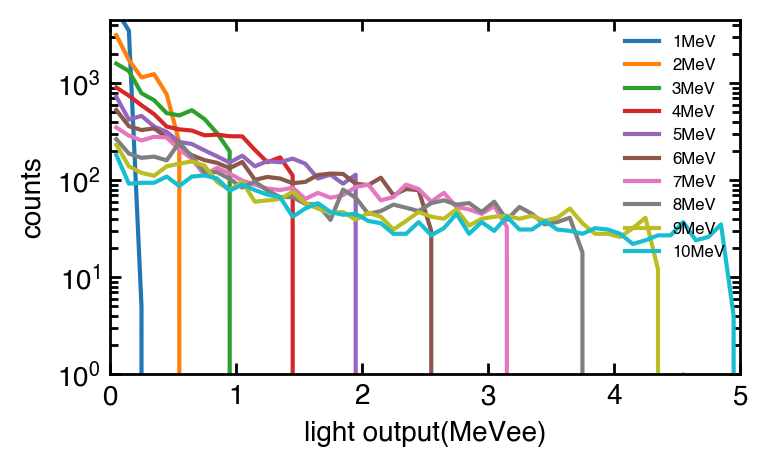

In [18]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_1MeV=sorting(data_1MeV[:,2],100,0,10)
axis,y_2MeV=sorting(data_2MeV[:,2],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,2],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,2],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,2],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,2],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,2],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,2],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,2],100,0,10)
axis,y_10MeV=sorting(data_10MeV[:,2],100,0,10)

plt.plot(axis,y_1MeV,label="1MeV")
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.plot(axis,y_10MeV,label="10MeV")
fig_post_def(xlim=(0,5),ylim=(1,4500),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")



In [19]:
print(axis)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15
 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55
 5.65 5.75 5.85 5.95 6.05 6.15 6.25 6.35 6.45 6.55 6.65 6.75 6.85 6.95
 7.05 7.15 7.25 7.35 7.45 7.55 7.65 7.75 7.85 7.95 8.05 8.15 8.25 8.35
 8.45 8.55 8.65 8.75 8.85 8.95 9.05 9.15 9.25 9.35 9.45 9.55 9.65 9.75
 9.85 9.95]


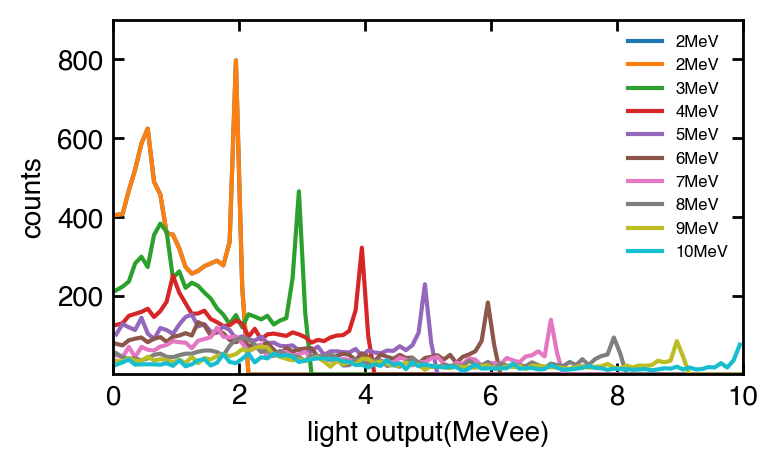

In [20]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_1MeV=sorting(data_1MeV[:,3],100,0,10)
axis,y_2MeV=sorting(data_2MeV[:,3],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3],100,0,10)
axis,y_10MeV=sorting(data_10MeV[:,3],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.plot(axis,y_10MeV,label="10MeV")
fig_post_def(xlim=(0,10),ylim=(1,900),xlabel="light output(MeVee)",ylabel="counts")
#plt.yscale("log")



In [21]:
print(data_2MeV[:,3].max())

2.00109


# neutron energy on recording detector surface

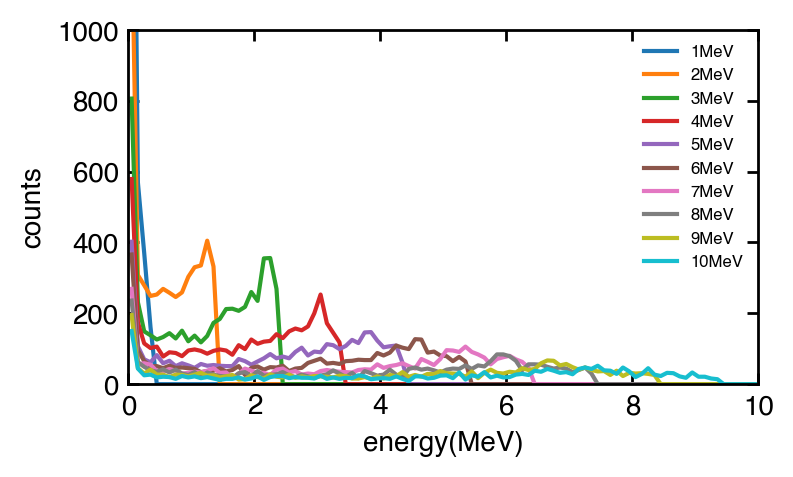

In [22]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
LO_threshold =0.1
data_1MeV_f = data_1MeV [data_1MeV [:,2]>LO_threshold]
data_2MeV_f = data_2MeV [data_2MeV [:,2]>LO_threshold]
data_3MeV_f = data_3MeV [data_3MeV [:,2]>LO_threshold]
data_4MeV_f = data_4MeV [data_4MeV [:,2]>LO_threshold]
data_5MeV_f = data_5MeV [data_5MeV [:,2]>LO_threshold]
data_6MeV_f = data_6MeV [data_6MeV [:,2]>LO_threshold]
data_7MeV_f = data_7MeV [data_7MeV [:,2]>LO_threshold]
data_8MeV_f = data_8MeV [data_8MeV [:,2]>LO_threshold]
data_9MeV_f = data_9MeV [data_9MeV [:,2]>LO_threshold]
data_10MeV_f =data_10MeV[data_10MeV[:,2]>LO_threshold]


axis,y_1MeV =sorting(data_1MeV_f[:,4],120,0,12)
axis,y_2MeV =sorting(data_2MeV_f[:,4],120,0,12)
axis,y_3MeV =sorting(data_3MeV_f[:,4],120,0,12)
axis,y_4MeV =sorting(data_4MeV_f[:,4],120,0,12)
axis,y_5MeV =sorting(data_5MeV_f[:,4],120,0,12)
axis,y_6MeV =sorting(data_6MeV_f[:,4],120,0,12)
axis,y_7MeV =sorting(data_7MeV_f[:,4],120,0,12)
axis,y_8MeV =sorting(data_8MeV_f[:,4],120,0,12)
axis,y_9MeV =sorting(data_9MeV_f[:,4],120,0,12)
axis,y_10MeV=sorting(data_10MeV_f[:,4],120,0,12)

plt.plot(axis,y_1MeV,label="1MeV")
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.plot(axis,y_10MeV,label="10MeV")
fig_post_def(xlim=(0,10),ylim=(0,1000),xlabel="energy(MeV)",ylabel="counts")

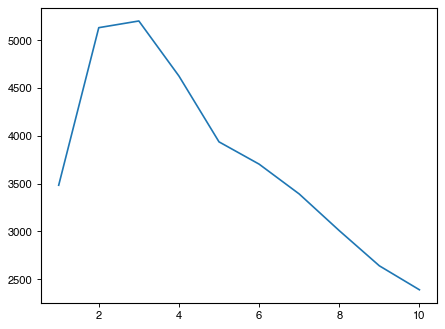

In [23]:
effeciency=[]
for i in np.arange(1,11,1):
    #data = vars("data_"+i+"MeV")
    data = eval("y_"+str(i)+"MeV")
    effeciency = np.append(effeciency,data.sum())
plt.plot(np.arange(1,11,1),effeciency)


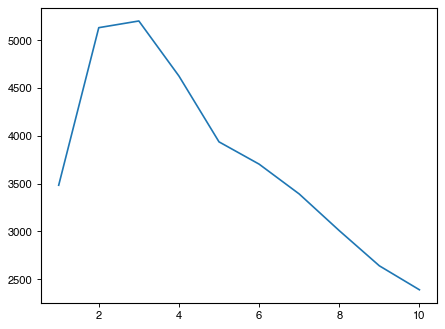

In [312]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,effeciency[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1])

In [314]:
np.savetxt('TOF_effciency.txt',output_effeciency)

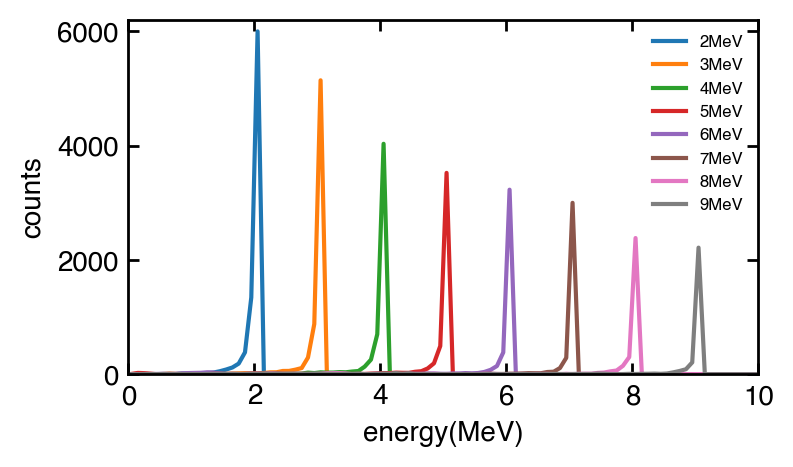

In [16]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3]+data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3]+data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3]+data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3]+data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3]+data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3]+data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3]+data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3]+data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,6200),xlabel="energy(MeV)",ylabel="counts")

In [17]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO

In [18]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


In [19]:
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

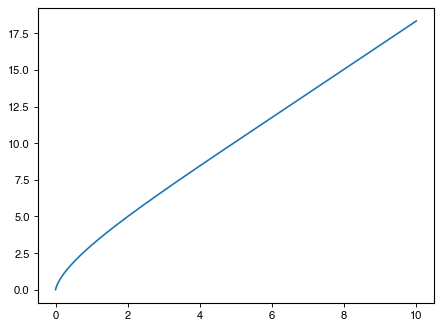

In [20]:
LO_range= np.arange(0,10,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [21]:
P_Energy_inter[9041]

0.5702714291205089

In [92]:
data_2MeV_LO=[]
for i in np.arange(0,len(data_2MeV[:,2]),1):
    index = int(data_2MeV[i,2]*100000)
    data_LO_temp = np.append(data_2MeV[i,:],P_Energy_inter[index])
    if i ==0: data_2MeV_LO = data_LO_temp.copy()
    else:     data_2MeV_LO = np.vstack((data_2MeV_LO,data_LO_temp))

In [93]:
data_3MeV_LO=[]
for i in np.arange(0,len(data_3MeV[:,2]),1):
    index = int(data_3MeV[i,2]*100000)
    data_LO_temp = np.append(data_3MeV[i,:],P_Energy_inter[index])
    if i ==0: data_3MeV_LO = data_LO_temp.copy()
    else:     data_3MeV_LO = np.vstack((data_3MeV_LO,data_LO_temp))

In [94]:
data_4MeV_LO=[]
for i in np.arange(0,len(data_4MeV[:,2]),1):
    index = int(data_4MeV[i,2]*100000)
    data_LO_temp = np.append(data_4MeV[i,:],P_Energy_inter[index])
    if i ==0: data_4MeV_LO = data_LO_temp.copy()
    else:     data_4MeV_LO = np.vstack((data_4MeV_LO,data_LO_temp))

In [95]:
data_5MeV_LO=[]
for i in np.arange(0,len(data_5MeV[:,2]),1):
    index = int(data_5MeV[i,2]*100000)
    data_LO_temp = np.append(data_5MeV[i,:],P_Energy_inter[index])
    if i ==0: data_5MeV_LO = data_LO_temp.copy()
    else:     data_5MeV_LO = np.vstack((data_5MeV_LO,data_LO_temp))

In [96]:
data_6MeV_LO=[]
for i in np.arange(0,len(data_6MeV[:,2]),1):
    index = int(data_6MeV[i,2]*100000)
    data_LO_temp = np.append(data_6MeV[i,:],P_Energy_inter[index])
    if i ==0: data_6MeV_LO = data_LO_temp.copy()
    else:     data_6MeV_LO = np.vstack((data_6MeV_LO,data_LO_temp))

In [97]:
data_7MeV_LO=[]
for i in np.arange(0,len(data_7MeV[:,2]),1):
    index = int(data_7MeV[i,2]*100000)
    data_LO_temp = np.append(data_7MeV[i,:],P_Energy_inter[index])
    if i ==0: data_7MeV_LO = data_LO_temp.copy()
    else:     data_7MeV_LO = np.vstack((data_7MeV_LO,data_LO_temp))

In [98]:
data_8MeV_LO=[]
for i in np.arange(0,len(data_8MeV[:,2]),1):
    index = int(data_8MeV[i,2]*100000)
    data_LO_temp = np.append(data_8MeV[i,:],P_Energy_inter[index])
    if i ==0: data_8MeV_LO = data_LO_temp.copy()
    else:     data_8MeV_LO = np.vstack((data_8MeV_LO,data_LO_temp))

In [99]:
data_9MeV_LO=[]
for i in np.arange(0,len(data_9MeV[:,2]),1):
    index = int(data_9MeV[i,2]*100000)
    data_LO_temp = np.append(data_9MeV[i,:],P_Energy_inter[index])
    if i ==0: data_9MeV_LO = data_LO_temp.copy()
    else:     data_9MeV_LO = np.vstack((data_9MeV_LO,data_LO_temp))

In [103]:
threshold =0.2
data_2MeV_LO_threshold=data_2MeV_LO[data_2MeV_LO[:,5]>threshold]
data_3MeV_LO_threshold=data_3MeV_LO[data_3MeV_LO[:,5]>threshold]
data_4MeV_LO_threshold=data_4MeV_LO[data_4MeV_LO[:,5]>threshold]
data_5MeV_LO_threshold=data_5MeV_LO[data_5MeV_LO[:,5]>threshold]
data_6MeV_LO_threshold=data_6MeV_LO[data_6MeV_LO[:,5]>threshold]
data_7MeV_LO_threshold=data_7MeV_LO[data_7MeV_LO[:,5]>threshold]
data_8MeV_LO_threshold=data_8MeV_LO[data_8MeV_LO[:,5]>threshold]
data_9MeV_LO_threshold=data_9MeV_LO[data_9MeV_LO[:,5]>threshold]

#data_2MeV_LO_threshold=data_2MeV_LO_threshold[data_2MeV_LO_threshold[:,5]>threshold]
#data_3MeV_LO_threshold=data_3MeV_LO_threshold[data_3MeV_LO_threshold[:,5]>threshold]
#data_4MeV_LO_threshold=data_4MeV_LO_threshold[data_4MeV_LO_threshold[:,5]>threshold]
#data_5MeV_LO_threshold=data_5MeV_LO_threshold[data_5MeV_LO_threshold[:,5]>threshold]
#data_6MeV_LO_threshold=data_6MeV_LO_threshold[data_6MeV_LO_threshold[:,5]>threshold]
#data_7MeV_LO_threshold=data_7MeV_LO_threshold[data_7MeV_LO_threshold[:,5]>threshold]
#data_8MeV_LO_threshold=data_8MeV_LO_threshold[data_8MeV_LO_threshold[:,5]>threshold]
#data_9MeV_LO_threshold=data_9MeV_LO_threshold[data_9MeV_LO_threshold[:,5]>threshold]

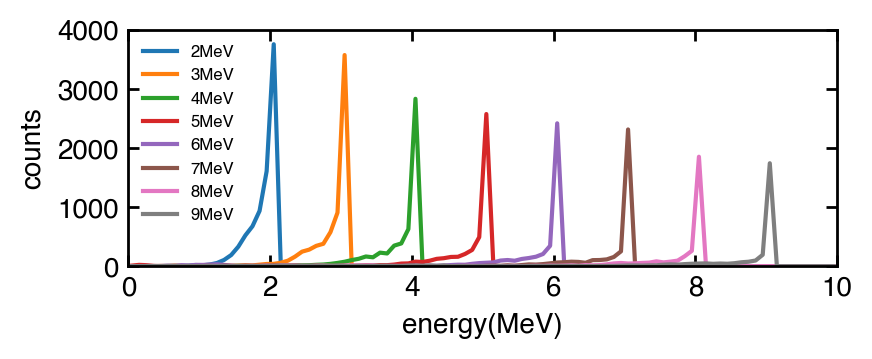

In [104]:
fig = fig_pre_def(9,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO[:,6]+data_2MeV_LO[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV_LO[:,6]+data_3MeV_LO[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV_LO[:,6]+data_4MeV_LO[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV_LO[:,6]+data_5MeV_LO[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV_LO[:,6]+data_6MeV_LO[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV_LO[:,6]+data_7MeV_LO[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV_LO[:,6]+data_8MeV_LO[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV_LO[:,6]+data_9MeV_LO[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
plt.legend(loc='upper left')
fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



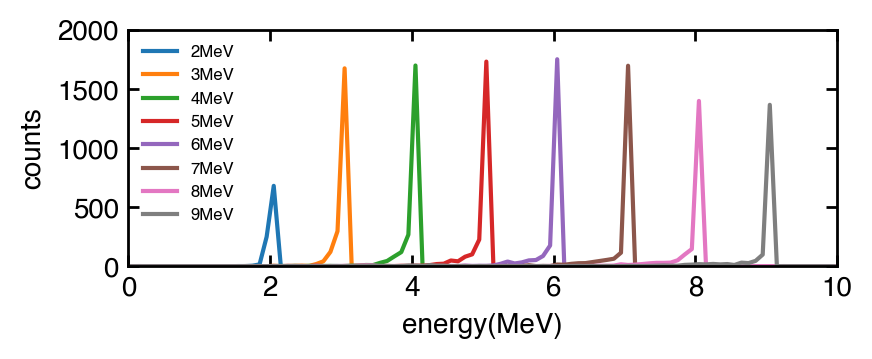

In [105]:
fig = fig_pre_def(9,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO_threshold[:,6]+data_2MeV_LO_threshold[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV_LO_threshold[:,6]+data_3MeV_LO_threshold[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV_LO_threshold[:,6]+data_4MeV_LO_threshold[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV_LO_threshold[:,6]+data_5MeV_LO_threshold[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV_LO_threshold[:,6]+data_6MeV_LO_threshold[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV_LO_threshold[:,6]+data_7MeV_LO_threshold[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV_LO_threshold[:,6]+data_8MeV_LO_threshold[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV_LO_threshold[:,6]+data_9MeV_LO_threshold[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")



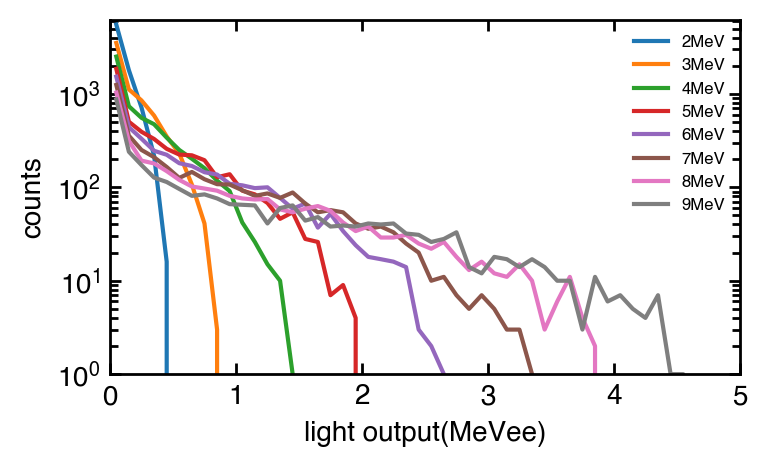

In [106]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,5],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,5],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,5],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,5],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,5],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,5],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,5],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,5],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,5),ylim=(1,6200),xlabel="light output(MeVee)",ylabel="counts")
plt.yscale("log")

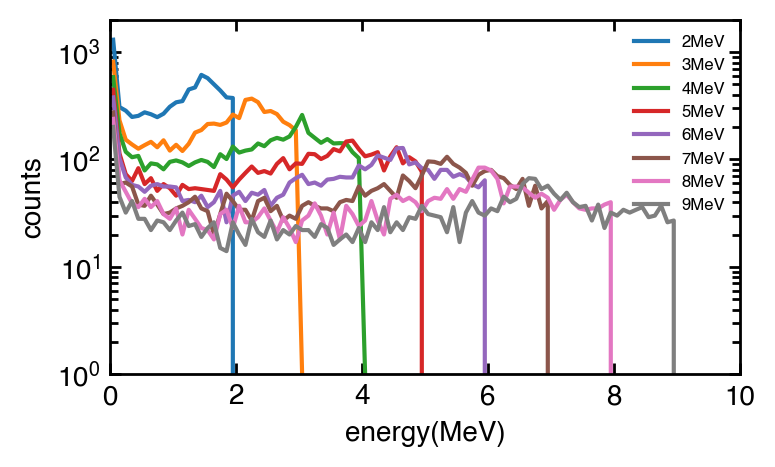

In [32]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

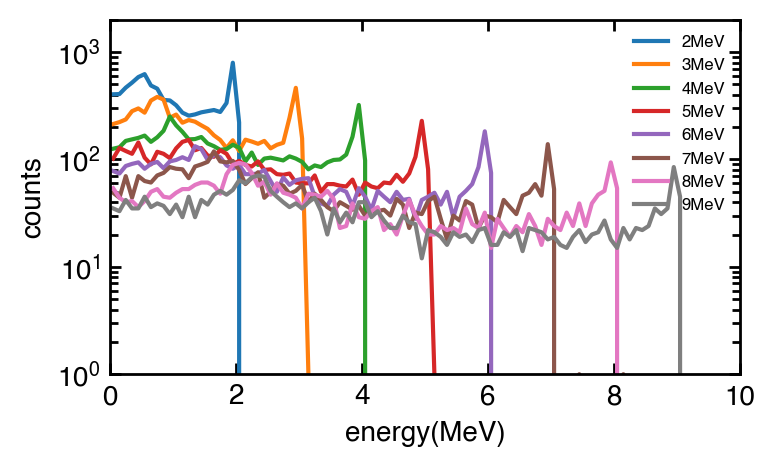

In [33]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

In [ ]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy intrigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")

In [183]:
data_2MeV_LO_02low = data_2MeV_LO[data_2MeV_LO[:,5]<0.2]
data_2MeV_LO_02high = data_2MeV_LO[data_2MeV_LO[:,5]>0.2]

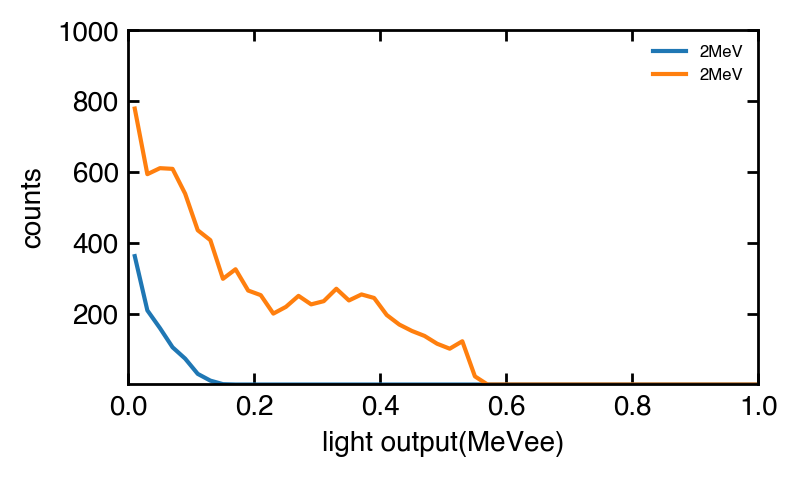

In [165]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO_02high[:,2],500,0,10)
axis,y_2MeV_O=sorting(data_2MeV_LO[:,2],500,0,10)

plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_2MeV_O,label="2MeV")
fig_post_def(xlim=(0,1),ylim=(1,1000),xlabel="light output(MeVee)",ylabel="counts")

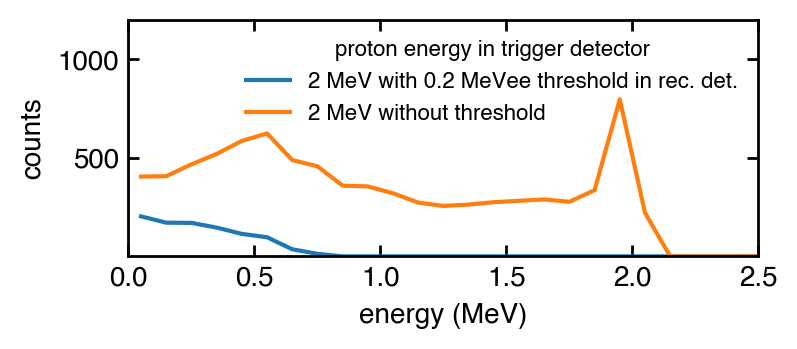

In [166]:
# proton energy in trigger detector
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV_LO_02high[:,3],100,0,10)
axis,y_2MeV_O=sorting(data_2MeV_LO[:,3],100,0,10)

plt.plot(axis,y_2MeV,label="2 MeV with 0.2 MeVee threshold in rec. det.")
plt.plot(axis,y_2MeV_O,label="2 MeV without threshold")

fig_post_def(xlim=(0,2.5),ylim=(1,1200),lg_fs=8,title ='proton energy in trigger detector',xlabel="energy (MeV)",ylabel="counts")

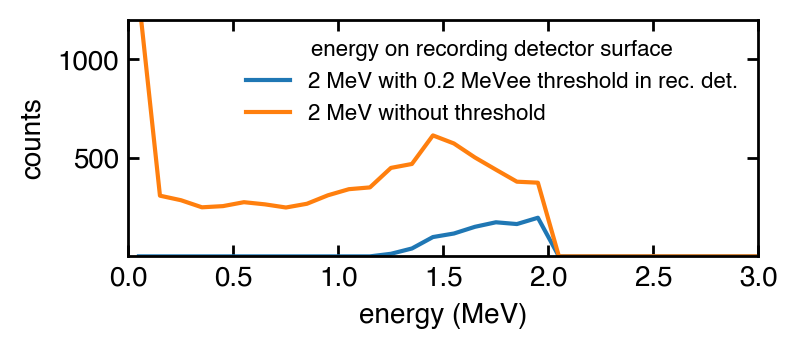

In [167]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO_02high[:,4],100,0,10)
axis,y_2MeV_O=sorting(data_2MeV_LO[:,4],100,0,10)

plt.plot(axis,y_2MeV,label="2 MeV with 0.2 MeVee threshold in rec. det.")
plt.plot(axis,y_2MeV_O,label="2 MeV without threshold")
fig_post_def(xlim=(0,3),ylim=(1,1200),lg_fs=8,title ='energy on recording detector surface',xlabel="energy (MeV)",ylabel="counts")

In [168]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy in trigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
print(data_2MeV_LO_02low[2,2:4])
lightoutput_2inches[448]


Core|| counts|| Lightoutput in trigger|| proton_energy in trigger|| neutron_energy on surface|| LO_in_n_detector||
[0.0833446 0.611899 ]


0.003082091797874338

In [169]:
data_2MeV_LO_02low_P_E   = data_2MeV_LO_02low[:,3]
data_2MeV_LO_02low_L_tri = data_2MeV_LO_02low[:,2]

In [179]:
LO_from_proton_E = []
for i in np.arange(0,len(data_2MeV_LO_02low_P_E),1):
    LO_temp = lightoutput_2inches[int(data_2MeV_LO_02low[i,3]*10000)]
    LO_from_proton_E = np.append(LO_from_proton_E,LO_temp)

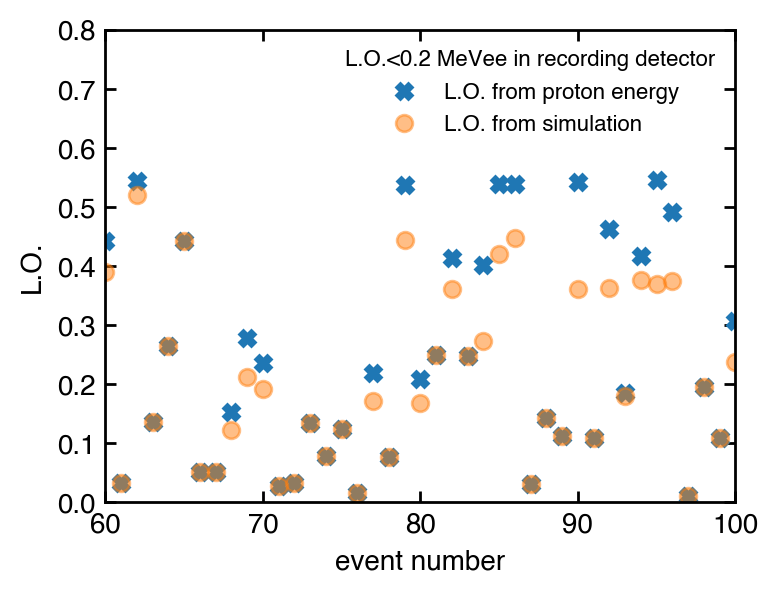

In [197]:
fig = fig_pre_def(8,6,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(LO_from_proton_E,'X', label="L.O. from proton energy")
plt.plot(data_2MeV_LO_02low_L_tri,'o',alpha=0.5,label = "L.O. from simulation")

plt.xlim(60,100)
plt.ylim(0,0.8)
fig_post_def(xlim=(60,100),ylim=(0,0.8),lg_fs=8,title ='L.O.<0.2 MeVee in recording detector',xlabel="event number",ylabel="L.O.")

In [184]:
data_2MeV_LO_02high_P_E   = data_2MeV_LO_02high[:,3]
data_2MeV_LO_02high_L_tri = data_2MeV_LO_02high[:,2]

In [186]:
LO_from_proton_E_high = []
for i in np.arange(0,len(data_2MeV_LO_02high_P_E),1):
    LO_temp = lightoutput_2inches[int(data_2MeV_LO_02high[i,3]*10000)]
    LO_from_proton_E_high = np.append(LO_from_proton_E_high,LO_temp)

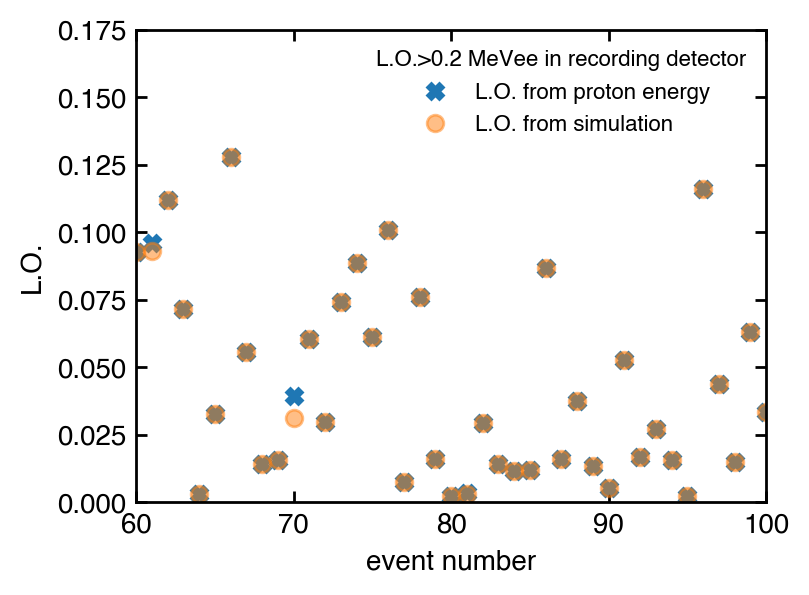

In [204]:
fig = fig_pre_def(8,6,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(LO_from_proton_E_high,'X', label="L.O. from proton energy")
plt.plot(data_2MeV_LO_02high_L_tri,'o',alpha=0.5,label = "L.O. from simulation")


fig_post_def(xlim=(60,100),ylim=(0,0.175),lg_fs=8,title ='L.O.>0.2 MeVee in recording detector',xlabel="event number",ylabel="L.O.")

In [34]:
data_AmBe=[]
for i in np.arange(1,30,1):
    if i ==1:
        data_AmBe = np.loadtxt("data_AmBe/202210_EJ309_N_scatter_exp_1E9_All_in_one_AmBe_"+str(int(i))+".txt")
    else:
        data_AmBe_temp = np.loadtxt("data_AmBe/202210_EJ309_N_scatter_exp_1E9_All_in_one_AmBe_"+str(int(i))+".txt")
        data_AmBe = np.vstack((data_AmBe,data_AmBe_temp))
        #print(data_6MeV.shape)

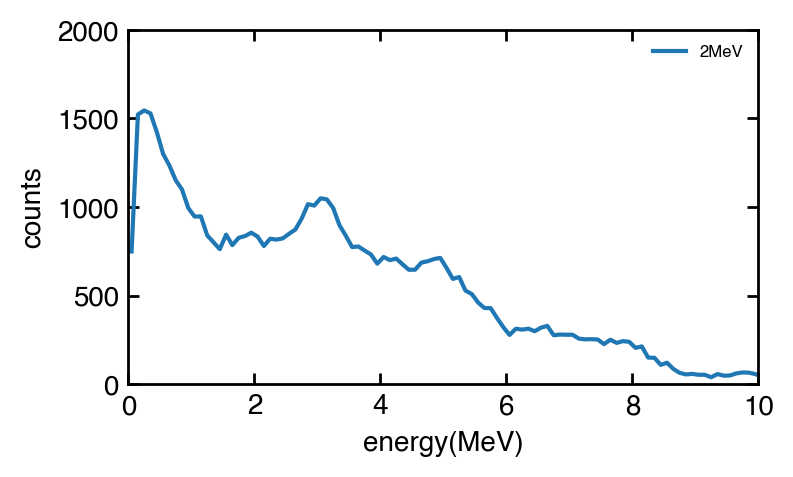

In [35]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_AmBe[:,3]+data_AmBe[:,4],120,0,12)
plt.plot(axis,y_AmBe,label="2MeV")

fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")





In [36]:
data_AmBe_LO=[]
for i in np.arange(0,len(data_AmBe[:,2]),1):
    index = int(data_AmBe[i,2]*100000)
    data_LO_temp = np.append(data_AmBe[i,:],P_Energy_inter[index])
    if i ==0: data_AmBe_LO = data_LO_temp.copy()
    else:     data_AmBe_LO = np.vstack((data_AmBe_LO,data_LO_temp))

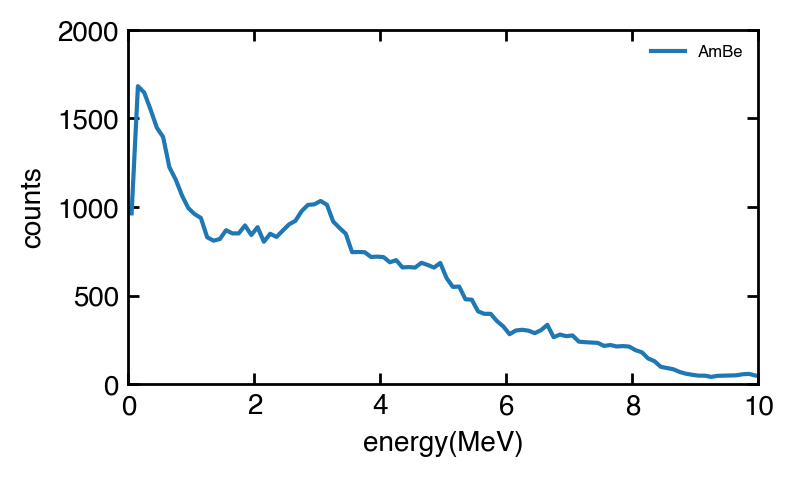

In [37]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_AmBe_LO[:,6]+data_AmBe_LO[:,4],100,0,10)

plt.plot(axis,y_AmBe,label="AmBe")

fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")

